In [13]:
import pandas as pd
df = pd.read_csv('data/monthly-beer-production-in-austr.csv')
df['Month'] = pd.to_datetime(df['Month'])
df.set_index('Month', inplace=True)
ts = df['Monthly beer production']

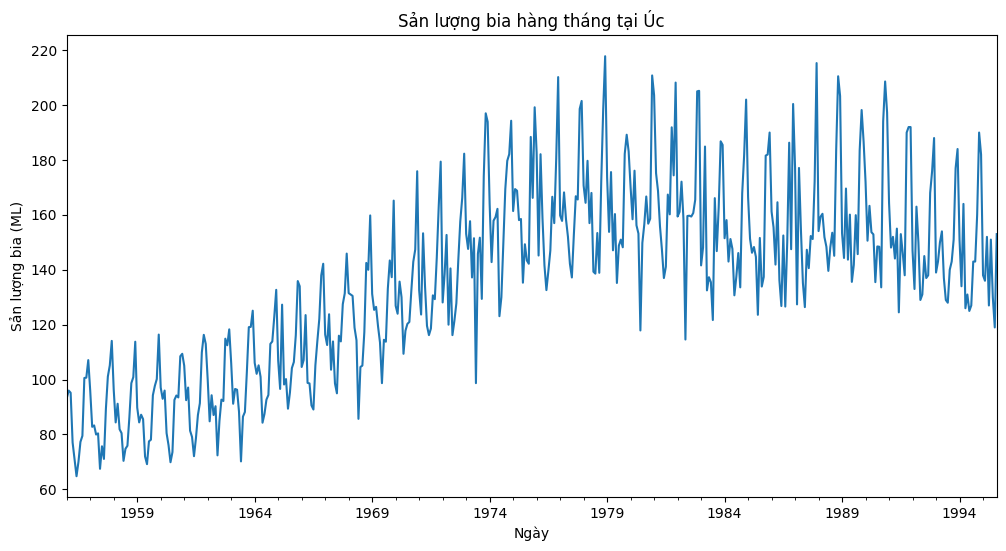

In [18]:
ts.plot(title='Sản lượng bia hàng tháng tại Úc', figsize=(12, 6))
import matplotlib.pyplot as plt
plt.xlabel('Ngày')
plt.ylabel('Sản lượng bia (ML)')
plt.show()

In [17]:
df2 = pd.read_csv('data/monthly-milk-production-pounds.csv')
df2['Month'] = pd.to_datetime(df2['Month'])
df2.set_index('Month', inplace=True)
ts2 = df2["Monthly milk production"]

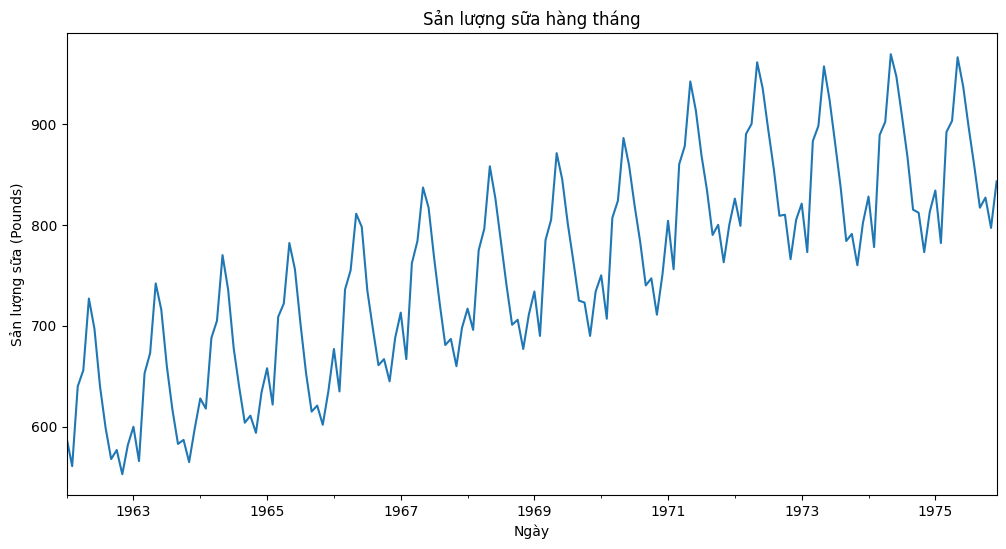

In [19]:
ts2.plot(title='Sản lượng sữa hàng tháng', figsize=(12, 6))
import matplotlib.pyplot as plt
plt.xlabel('Ngày')
plt.ylabel('Sản lượng sữa (Pounds)')
plt.show()

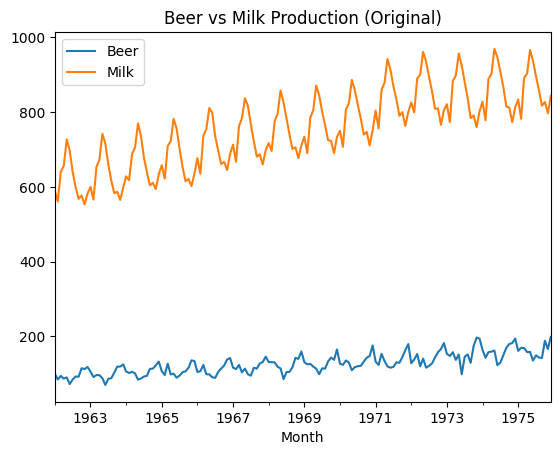

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm

# Đọc dữ liệu
beer_df = pd.read_csv('data/monthly-beer-production-in-austr.csv')
milk_df = pd.read_csv('data/monthly-milk-production-pounds.csv')

# Đổi tên cột cho dễ xử lý
beer_df.columns = ['Month', 'Beer']
milk_df.columns = ['Month', 'Milk']

# Đổi định dạng thời gian
beer_df['Month'] = pd.to_datetime(beer_df['Month'])
milk_df['Month'] = pd.to_datetime(milk_df['Month'])

# Merge 2 dữ liệu theo thời gian chung
df = pd.merge(beer_df, milk_df, on='Month')
df.set_index('Month', inplace=True)

# Vẽ 2 chuỗi ban đầu
df.plot(title="Beer vs Milk Production (Original)")
plt.show()


In [21]:
def adf_test(series, name):
    result = adfuller(series)
    print(f"ADF test for {name}:")
    print(f"  Test Statistic = {result[0]}")
    print(f"  p-value = {result[1]}")
    print(f"  => {'Dừng' if result[1] < 0.05 else 'Không dừng'}\n")

adf_test(df['Beer'], 'Beer Production')
adf_test(df['Milk'], 'Milk Production')


ADF test for Beer Production:
  Test Statistic = 0.9440991782231092
  p-value = 0.9936396714373088
  => Không dừng

ADF test for Milk Production:
  Test Statistic = -1.3038115874221308
  p-value = 0.6274267086030311
  => Không dừng



In [22]:
X = sm.add_constant(df['Milk'])  # Thêm hằng số
model_spurious = sm.OLS(df['Beer'], X).fit()
print(model_spurious.summary())


                            OLS Regression Results                            
Dep. Variable:                   Beer   R-squared:                       0.177
Model:                            OLS   Adj. R-squared:                  0.172
Method:                 Least Squares   F-statistic:                     35.58
Date:                Tue, 03 Jun 2025   Prob (F-statistic):           1.43e-08
Time:                        17:38:19   Log-Likelihood:                -778.55
No. Observations:                 168   AIC:                             1561.
Df Residuals:                     166   BIC:                             1567.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         41.0839     14.449      2.843      0.0

In [23]:
# Sai phân để làm dừng
df_diff = df.diff().dropna()

# Kiểm tra lại tính dừng
adf_test(df_diff['Beer'], 'Beer Production (sai phân)')
adf_test(df_diff['Milk'], 'Milk Production (sai phân)')

# Hồi quy sau khi làm dừng
X_diff = sm.add_constant(df_diff['Milk'])
model_valid = sm.OLS(df_diff['Beer'], X_diff).fit()
print(model_valid.summary())


ADF test for Beer Production (sai phân):
  Test Statistic = -10.486241448886151
  p-value = 1.1783759127597203e-18
  => Dừng

ADF test for Milk Production (sai phân):
  Test Statistic = -3.0549955586530992
  p-value = 0.03006800400178324
  => Dừng

                            OLS Regression Results                            
Dep. Variable:                   Beer   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.006
Method:                 Least Squares   F-statistic:                   0.05926
Date:                Tue, 03 Jun 2025   Prob (F-statistic):              0.808
Time:                        17:38:25   Log-Likelihood:                -714.66
No. Observations:                 167   AIC:                             1433.
Df Residuals:                     165   BIC:                             1440.
Df Model:                           1                                         
Covariance Type:            nonrobust   